<a href="https://colab.research.google.com/github/bilik49/statistical_analysis/blob/main/nonparametric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

In [9]:
df = pd.read_csv('/content/drive/MyDrive/data/statistic/data_big.csv')
cities = pd.read_csv('/content/drive/MyDrive/data/statistic/cities.csv')

In [4]:
df.head()

,Unnamed: 0,X.1,depressed.mood.1,anxiety.1,suspiciousness.1,irritability.1,craving.to.alcohol.1,weakness.1,insomia.1,headache.1,...,combined2.9,HR.9,SBP.9,DBP.9,MBP.9,SV.9,CO.9,SI.9,CI.9,TPR.9
0,1,1,1,1,0,1,1,1,1,0,...,0,68.0,108.0,70.0,83.0,74.0,5.0,40.0,2.7,1321.0
1,2,2,1,1,0,0,1,1,2,1,...,9,63.0,114.0,70.0,85.0,123.0,7.7,60.0,3.8,879.0
2,3,3,1,1,0,0,0,2,1,0,...,0,64.0,120.0,80.0,93.0,106.0,6.8,55.0,3.5,1098.0
3,4,4,2,2,0,0,0,2,0,0,...,0,56.0,124.0,90.0,101.0,90.0,5.1,43.0,2.4,1600.0
4,5,5,1,1,0,0,2,2,1,0,...,0,66.0,116.0,78.0,90.0,90.0,5.9,45.0,2.2,1228.0


In [63]:
df.columns = [col.replace('.','_') for col in df.columns]
df.columns

Index(['Unnamed: 0', 'X_1', 'depressed_mood_1', 'anxiety_1',
       'suspiciousness_1', 'irritability_1', 'craving_to_alcohol_1',
       'weakness_1', 'insomia_1', 'headache_1',
       ...
       'combined2_9', 'HR_9', 'SBP_9', 'DBP_9', 'MBP_9', 'SV_9', 'CO_9',
       'SI_9', 'CI_9', 'TPR_9'],
      dtype='object', length=121)

In [64]:
df.columns[df.nunique() > 5]

Index(['Unnamed: 0', 'X_1', 'combined1_1', 'combined2_1', 'HR_1', 'SBP_1',
       'DBP_1', 'MBP_1', 'SV_1', 'CO_1', 'SI_1', 'CI_1', 'TPR_1', 'X_2',
       'combined1_2', 'combined2_2', 'HR_2', 'SBP_2', 'MBP_2', 'DBP_2', 'SV_2',
       'CO_2', 'SI_2', 'CI_2', 'TPR_2', 'X_3', 'combined1_3', 'combined2_3',
       'HR_3', 'SBP_3', 'DBP_3', 'MBP_3', 'SV_3', 'CO_3', 'SI_3', 'CI_3',
       'TPR_3', 'X_9', 'HR_9', 'SBP_9', 'DBP_9', 'MBP_9', 'SV_9', 'CO_9',
       'SI_9', 'CI_9', 'TPR_9'],
      dtype='object')

In [52]:
df.columns[(df.nunique() > 2) & (df.nunique() < 5)]

Index(['anxiety.1', 'irritability.1', 'craving.to.alcohol.1', 'weakness.1',
       'insomia.1', 'headache.1', 'tremor.1', 'sweating.1',
       'transient.hallusinations.1', 'vomiting.1', 'anoreksia.1', 'thirst.1',
       'chest.pain.1', 'hyperemia.1', 'depressed.mood.2',
       'craving.to.alcohol.2', 'weakness.2', 'insomia.2', 'headache.2',
       'tremor.2', 'sweating.2', 'anoreksia.2', 'thirst.2', 'weakness.3',
       'insomia.3', 'tremor.3', 'sweating.3', 'thirst.3', 'combined1.9',
       'combined2.9'],
      dtype='object')

1. Однофакторный дисперсионный анализ (ANOVA)

In [90]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('combined2_1 ~ C(anxiety_1)', data=df).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(anxiety_1),2.0,31.151176,15.575588,5.377472,0.009889
Residual,31.0,89.790000,2.896452,NaN,NaN


In [82]:
st.f_oneway(df['combined2_1'][df['anxiety_1'] == 0],
               df['combined2_1'][df['anxiety_1'] == 1],
               df['combined2_1'][df['anxiety_1'] == 2])

F_onewayResult(statistic=5.3774722719024135, pvalue=0.009888573149631517)

2. Критерий W-Вилкоксона (проверка однородности двух 
зависимых выборок)

In [94]:
st.wilcoxon(df['HR_1'], df['HR_2'])

WilcoxonResult(statistic=421.0, pvalue=0.017333359338866837)

3. Критерий Фридмана (проверка однородности нескольких зависимых выборок)

In [95]:
st.friedmanchisquare(df['SBP_1'],df['SBP_2'],df['SBP_3'],df['SBP_9'])

FriedmanchisquareResult(statistic=34.24850299401196, pvalue=1.7557383500586175e-07)

4. Критерий Краскела-Уоллиса (проверка однородности нескольких независимых выборок)

In [112]:
st.kruskal(df['SBP_1'],df['DBP_1'], df['MBP_1'], nan_policy='omit')

KruskalResult(statistic=74.4921277011509, pvalue=6.671753576011461e-17)

5. Медианный критерий (проверка однородности нескольких независимых выборок)

In [117]:
_, p_value, grand_median, table = st.median_test(df['SBP_1'], df['DBP_1'], df['MBP_1'], nan_policy='omit')
p_value

5.845096277870607e-14

---

Линейная регрессия.

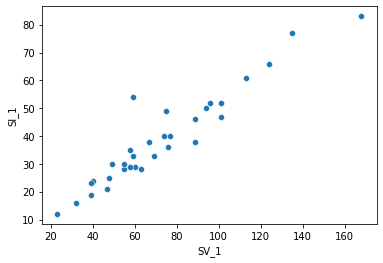

In [124]:
sns.scatterplot(data = df, x = 'SV_1', y = 'SI_1')

In [141]:
x = df['SI_1'].dropna()
y = df['CI_1'].dropna()
st.linregress(x,y)

LinregressResult(slope=0.05282184104972485, intercept=0.9831179999865634, rvalue=0.8396381039004138, pvalue=1.0132882274169944e-09, stderr=0.006137017156746934, intercept_stderr=0.26150441276806535)

In [147]:
st.pearsonr(x, y)

(0.8396381039004139, 1.0132882274169876e-09)

In [145]:
st.kendalltau(x,y)

KendalltauResult(correlation=0.6595952922185062, pvalue=1.0819766571177962e-07)

In [146]:
st.spearmanr(x,y)

SpearmanrResult(correlation=0.8391093370570679, pvalue=1.0622063978902586e-09)

In [12]:
cities.head()

,BLACKproc,GROSS,OLD,LANG,HH1,DEATH,INCOME,ASSIST,OWNER,RENTER,...,CRIME,POVERT,OLB_BIL,CONDOM,TRANSP,LAB_F,MANLAB,POP80,TAXE,STATE
0,"22,6",422,"9,2","6,3","31,3","14,2",26651,"9,4",66000,"53,4",...,10145,"17,2","17,5","5,8","4,7","63,4","11,6",565021,428,OH
1,"46,6",322,14,"11,1","33,5",17,17822,"21,9",40900,"52,1",...,8945,"28,7","52,6",1,"14,1","48,1","23,1",573822,545,OH
2,"37,9",329,"13,9","5,4","39,5","11,1",21006,"14,3",61900,"61,7",...,9722,"24,3","43,1",2,"11,2","55,1","15,4",385409,615,OH
3,"19,7",378,"13,6","6,9","29,7","10,9",24819,"12,3",48900,"39,3",...,9503,"19,1","35,1","1,4",3,"54,4","19,6",354635,377,OH
4,"24,5",360,"14,9",6,"30,8","11,3",22279,"14,2",43800,"41,3",...,8066,"20,5","36,8","2,2","3,3","51,6","20,7",237177,415,OH


In [11]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BLACKproc  25 non-null     object
 1   GROSS      25 non-null     int64 
 2   OLD        25 non-null     object
 3   LANG       25 non-null     object
 4   HH1        25 non-null     object
 5   DEATH      25 non-null     object
 6   INCOME     25 non-null     int64 
 7   ASSIST     25 non-null     object
 8   OWNER      25 non-null     int64 
 9   RENTER     25 non-null     object
 10  UNEMP      25 non-null     object
 11  LABOR      25 non-null     object
 12  POP_CH     25 non-null     object
 13  POP92      25 non-null     int64 
 14  HISPproc   25 non-null     object
 15  ASIANproc  25 non-null     object
 16  BORN_F     25 non-null     object
 17  FAMIL1     25 non-null     object
 18  SCHOOL     25 non-null     object
 19  CRIME      25 non-null     int64 
 20  POVERT     25 non-null     object


Однофакторный дисперсионный анализ (ANOVA) + попарные сравнения

Критерий W-Вилкоксона (проверка однородности двух независимых выборок)

Критерий W-Вилкоксона (проверка однородности двух зависимых выборок)

Критерий Фридмана (проверка однородности нескольких зависимых выборок)

Критерий Краскела-Уоллиса (проверка однородности нескольких независимых выборок)

Медианный критерий (проверка однородности нескольких независимых выборок)

---

Линейная регрессия. Коэффициент детерминации. Квадрат
выборочного коэффициента корреляции.

Ранговая корреляция Пирсона/Кенделла/Спирмена.

In [29]:
ct = cities.select_dtypes(include=['object']).drop('STATE', axis = 1)
for column_float in ct:
  ct[column_float] = ct[column_float].apply(lambda x: x.replace(',','.')).astype(np.float64)